In [1]:
# default_exp reduction
# default_cls_lvl 2

# Chapter 8. Dimensionality Reduction
>

- Many ML problems will involve thousands or even millions of features per instance.
- Not only all of these features make training extremly slow, but they can also make it much harder for an optimization method to find a good solution.
- This problem is often referred to as the **curse of dimensionality**.
- In real world problem, it is often possible to reduce the number of features considerably.
    - Turning an intractable problem into a tractable one.
- The goal is to remove the maximum number of features while minimizing information loss that relates to a specific task
    - Task example — Classifying MNIST digits.
- Reducing dimensionality does cause some information loss.
- It also makes your pipeline a bit more complex and thus harder to maintain.
- Dimensionality reduction is usually conducted to **speed up training**.
- Dimensionality reduction is also extremly useful for data visualization.
    - Taking it down to 2/3 dimensions for your data set will allow you visualize it in a 2/3D space.
- DataViz is also important to communicate your findings to people who are not data scientists.
    - In Particular, decision makers who will use your results.

- In this chapter we will:
    - Discuss the curse of dimenstionality.
    - Get a sense of what goes on in a high-dimenstional space.
    - Consider the main two approaches to dimensionality reduction:
        - Projection
        - Manifold Learning
    - Go through 3 popular dimensionality reduction techniques:
        - PCA
        - Kernel PCA
        - LLE

## The Curse of Dimensionality

- We are so used to living in three dimensions
    - 4 if you consider time, and a few more if you are a string theorist.
- It turns out that many things behave very differently in high-dimensional spaces.
- If you pick a random point in a unit square, it will have ~0.4% chance of being located at <0.001 from a border.
- But in a 1,000-dimensional hyper-cube the probability is >99.999999%.
    - Most points in a high-dimensional space are very close to the border.
- Same goes to distances betweeen points, If you pick two random points in a lower dimensional space, they will be closer in comparison to picking them from a high-dimensional space.
- **There is just plenty of space in a high-dimensional one!**
- High-dimensional datasets are at risk of being too sparse.
- The most dimensions a dataset has, the more risk it is to overfit it.

## Main Approaches to Dimensionality Reduction

### Projection

- In most real-world problems, training instances are not spread out uniformly across the dimensions.
    - Many features are almost constant, while others are highly correlated.
- As a result, all training instances like close to a much-lower dimensional **subspace** of the high-dimensional space.
- Here is an example of that:

<div style="text-align:center;">
    <img style="width:50%" src="static/imgs/subspace_projection.png" />
</div>

- If we perpenducarly project every training instance into the subspace, we get a new 2D dataset represented as follows:

<div style="text-align:center;">
    <img style="width:50%" src="static/imgs/2d_projection.png" />
</div>

- However, projection is not always to best approach to dimensionality reduction.
    - In many case the subspace may twist & turn.

### Manifold Learning

- A 2D manifold is a 2D shape that can be bent & twisted in a higher-dimensional space.
- More generally, a d-dimensional manifold is part of an n-dimensional space (where d < n), that locally resembles a d-dimensional hyperplace.
- Many dimensionality reduction algorithms work by modeling the manifold on which the training instances lie, this is called **Manifold Learning**.
    - It relies on the *manifold assumption*, also called the *manifold hypothesis*.
        - Which holds that most real world high-dimensional datasets lie close to a much lower-dimensional manifold.
            - **This assumption is very often empirically observed**.
- Thought experiment
    - If you were to generate random images on a 28x28 grid, only a very small fraction of them would look like handwritten digits.
    - In other words, the degrees of freedom available to you if you were to create a digit image are very low compared to the degree of freedom you have when you want to create any image you want (random).
    - **These constraints tend to squeeze the dataset into a lower-dimensional manifold**.
- An implicit additional assumption is that the task at hand (being regression or classification) would be much easier if conducted on the lower dimensional manifold space.
    - This assumption does not always hold.
    - Examples to follow:

<div style="text-align:center;">
    <img style="width:50%" src="static/imgs/manifold_classification.png" />
</div>

- In short, reducing the dimensionality of your dataset will speed up training, but it doesn't guarantee a simpler solution.
    - It all depends on the dataset and the task at hand.
- Now we will go through some of the most popular dimensionality reduction algorithms.

## PCA

- Principal Component Analysis is by far the most popular dimensionality reduction algorithm.
- First, **It identifies the hyperplane that lies closest to the data**.
- Then, **It projects the data into it**.

### Preserving the Variance

- We want to choose a hyperplace that most preserves tha variance within the data, following is attempted projections for 3 chosen hyperplanes (1D axis):

<div style="text-align:center;">
    <img style="width:66%" src="static/imgs/2D_variance_projection.png" />
</div>

- It seems reasonable to select the axis that preserves the maximum amount of variance.
    - As it will most likely lose less information than other projections.
- Another way of looking at it is by choosing the solid line axis, we are minimizing the mean squared distance between the original points and their projections into the chosen axis.
    - This is the rather simple idea behind PCA.

### Principle Components

- PCA identifies the axis that accounts for the largest amount of variance in the training set.
- It also finds a second axis, orthogonal to the first one, that accounts for the largest amount of remaining variance.
- If we're considering a higher-dimensional dataset, PCA would also find a third axis, and a fourth, and a fifth, and so on...
    - As many axes as the number of dimensions in the dataset.
- The ith axis is called the ith **principal component** of the data.
- So how can you find the principal components of a training set?
- There is a standard matrix vectorization technique called *Singular Value Decomposition (SVD)*
    - It can decompose the training set $X$ into $X=U \Sigma V^T$
    - $V$ contains the unit vectors that define all the principal components that we are looking for:
    
$$V=
  \begin{pmatrix}
    \vert & \vert & \dots & \vert \\
    c_1 & c_2 & \dots & c_n \\
    \vert & \vert & \dots & \vert \\
  \end{pmatrix}
$$

- let's extract the principal components of a dataset using numpy's `svd` implementation:

- Let's start by generating some data:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [6]:
X = np.linspace(start=-1., stop=1., num=100)
y = X + np.random.normal(size=100)/7.
X.shape, y.shape

((100,), (100,))

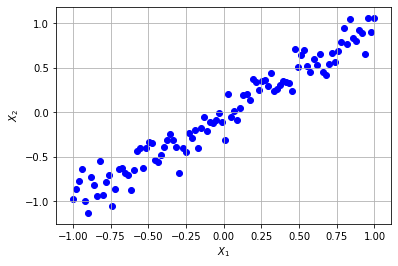

In [7]:
plt.scatter(X, y, c='blue')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.grid()
plt.show()

In [9]:
X = np.concatenate((X[..., None], y[..., None]), axis=1)
X.shape

(100, 2)

In [10]:
X_centered = X - X.mean(axis=0)

In [12]:
U, s, Vt = np.linalg.svd(a=X_centered)

In [14]:
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

In [15]:
c1, c2

(array([0.70581358, 0.70839762]), array([ 0.70839762, -0.70581358]))

- These two 2D points represent the unit vector points (origin at (0,0)) corresponding to the 2 principal components (axes that preserve variance).
- PCA assumes that the dataset is centered around the origin, but scikit-learn implementation takes care of centering the data for you.

### Projecting down to $d$ Dimensions